# Pytorch图像分类器
  
处理数据：使用标准 python 包将数据加载成 numpy 数组格式，然后将这个数组转换成 torch.*Tensor*  
对于视觉，创建了totchvision 的包，该包含有支持加载类似Imagenet，CIFAR10，MNIST 等公共数据集的数据加载模块 torchvision.datasets 和支持加载图像数据数据转换模块 torch.utils.data.DataLoader。  
  
这里使用CIFAR10数据集，包含十个类别：‘airplane’,‘automobile’,‘bird’,‘cat’,‘deer’,‘dog’,‘frog’,
‘horse’,‘ship’,‘truck’。CIFAR-10 中的图像尺寸为3\*32\*32，也就是RGB的3层颜色通道，每层通道内的尺寸为32\*32。


### 训练一个图像分类器的步骤  
  
A. 使用torchvision加载并且归一化CIFAR10的训练和测试数据集  
B. 定义一个卷积神经网络  
C. 定义一个损失函数  
D. 在训练样本数据上训练网络  
E. 在测试样本数据上测试网络  

In [1]:
# 加载和归一化

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 0)
testset = torchvision.datasets.CIFAR10(root='./data', train = False,download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# 展示训练图片

In [10]:
import matplotlib.pyplot as plt
import numpy as np

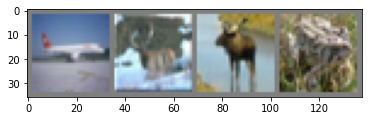

plane  deer  deer  frog


In [11]:
def imshow(img):
    img = img/2 + 0.5 # unnormalize：[-1,1]变为[0.1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()  # 一个batch

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [3]:
# 定义一个卷积神经网络 在这之前从神经网络章节复制神经网络，并修改它为3通道的图片(在此之前它被定义为1通道)
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Conv2d的参数
        # [ channels, output, height_2, width_2 ]
        # channels,          通道数，和上面保持一致，也就是当前层的深度
        # output             输出的深度
        # height_2,          过滤器filter的高
        # width_2,           过滤器filter的宽
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
# 定义损失函数和优化器
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum = 0.9)

In [8]:
# 训练网络
# 只需要在数据迭代器上循环传给网络和优化器输入就可以
for epoch in range(2):
    print('epoch', epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

epoch 0
[1,  2000] loss:   1
[1,  4000] loss:   1
[1,  6000] loss:   1
[1,  8000] loss:   1
[1, 10000] loss:   1
[1, 12000] loss:   1
epoch 1
[2,  2000] loss:   1
[2,  4000] loss:   1
[2,  6000] loss:   1
[2,  8000] loss:   1
[2, 10000] loss:   1
[2, 12000] loss:   1
Finished Training


In [7]:
# 训练网络
# 只需要在数据迭代器上循环传给网络和优化器输入就可以
for epoch in range(2):  
    # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.223
[1,  4000] loss: 1.865
[1,  6000] loss: 1.674
[1,  8000] loss: 1.584
[1, 10000] loss: 1.515
[1, 12000] loss: 1.477
[2,  2000] loss: 1.420
[2,  4000] loss: 1.371
[2,  6000] loss: 1.342
[2,  8000] loss: 1.312
[2, 10000] loss: 1.308
[2, 12000] loss: 1.272
Finished Training


#### 查看训练效果

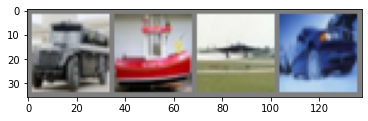

truck  ship plane   car


In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()  # 一个batch

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  truck   car  ship   car


In [19]:
# 评估整个网络的情况：
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)  # 这里可以写outputs.data,也可以写outputs
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [23]:
class_correct = list(0. for _ in range(10))
class_total = list(0. for _ in range(10))
cout = True
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)  # 这里可以写outputs.data,也可以写outputs
        c = (predicted == labels)  # 这里加不加.squeeze()都可以
        if cout:
            print(predicted)
            print(c)
            c1 = (predicted == labels)
            print(c1)
            cout = False
        for i in range(4):
            label = labels[i]
            class_total[label] += 1
            class_correct[label] += c[i].item()

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
            

tensor([3, 8, 8, 0])
tensor([True, True, True, True])
tensor([True, True, True, True])
Accuracy of plane : 55 %
Accuracy of   car : 73 %
Accuracy of  bird : 49 %
Accuracy of   cat : 56 %
Accuracy of  deer : 53 %
Accuracy of   dog : 31 %
Accuracy of  frog : 71 %
Accuracy of horse : 65 %
Accuracy of  ship : 73 %
Accuracy of truck : 75 %


#### 将神经网络转到GPU上

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0
